Robert Miller

I pledge my honor that I have abided by the Stevens Honor System

# Naive Bayes Classification

In [15]:
#Step 1 Import the data
from sklearn import datasets
from scipy.stats import multivariate_normal
import math as math
import numpy as np
X,y = datasets.make_blobs(n_samples= 400, n_features = 5, centers = 4, cluster_std = 2, random_state= 100)

In [16]:
#a)
unique, counts = np.unique(y, return_counts = True) #This function splits the data into 4 unique classes, and then classifies each point
#as relating to one of those unique classes, making it easier to calculate probabilities
prior_probs = counts / len(y)
#printing the classes
for i in range(len(prior_probs)):
  print("Prior Probability of class ", unique[i], " : ", prior_probs[i])

Prior Probability of class  0  :  0.25
Prior Probability of class  1  :  0.25
Prior Probability of class  2  :  0.25
Prior Probability of class  3  :  0.25


In [17]:
#b)
likelihoods = []#this matrix will contain the likelihood of each
class_means = []
class_covs = []
constantA = []
for i in range(4):
  CK = X[y == i] #get the samples in each class
  class_means.append(np.mean(CK, axis =0)) #Get mean vector
  covariance = np.dot((CK - class_means[i]).T, (CK- class_means[i])) / len(CK)
  constantA.append(1/((2 * math.pi)**2) * 1/(np.linalg.norm(covariance)**(1/2)))
  class_covs.append(covariance)

In [18]:
for j in range(len(X)):
  obs_mat = []
  for k in range(4):
    obsv = X[j]
    step1 = np.dot((obsv - class_means[k]).T, np.linalg.inv(class_covs[k]))
    likelihood = (constantA[k] * np.exp(-1/2 * (step1 @ (obsv - class_means[k]))))
    obs_mat.append(likelihood)
  likelihoods.append(obs_mat)
  print(f"The Likelihoods of p(x | Ck) for observation {j} are {obs_mat}")

The Likelihoods of p(x | Ck) for observation 0 are [1.1743524663393128e-17, 2.28445761062358e-38, 5.67138464730138e-28, 0.0013330190632397751]
The Likelihoods of p(x | Ck) for observation 1 are [2.2062487175708077e-17, 2.33346528363984e-25, 8.167996558908876e-06, 1.987387758458322e-25]
The Likelihoods of p(x | Ck) for observation 2 are [0.0045804513694477685, 5.897145410864598e-31, 4.674310960115675e-21, 4.0139665155727893e-17]
The Likelihoods of p(x | Ck) for observation 3 are [4.609393310614384e-15, 5.053150756466152e-39, 2.1962359416563436e-21, 0.0034657187218903314]
The Likelihoods of p(x | Ck) for observation 4 are [4.7506853382404435e-24, 4.1389905601752385e-56, 4.230345264636476e-31, 0.0001463110524038366]
The Likelihoods of p(x | Ck) for observation 5 are [1.059977517416018e-37, 0.0005470201218884155, 1.4538329307496564e-32, 2.110004049345881e-48]
The Likelihoods of p(x | Ck) for observation 6 are [5.435278508433182e-19, 9.272913015376448e-46, 1.9454418876340828e-31, 0.00196210

In [19]:
#step c calculate the posterior probs, then assign class to each observation
#The equation for multiple classes is wk = class_mean * (1/covariance) , wk0 = -1/2 * class_mean.T * 1/covariance * class_mean + ln(prior_probs[k])
#The prediction for each data point is h(x) = wk.T * x + wk0
class_weights = []
class_initials = []
class_id = 0
predictions = [] #Store the prediction of each observation AFTER calculating posterior probability
for i in range(4): #calculate the weights of classes, both initial and in general
  wk = class_means[i] @ np.linalg.inv(class_covs[i])
  wk0 = (-1/2 * class_means[i].T @ np.linalg.inv(class_covs[i]) @ class_means[i]) + np.log(prior_probs[i])
  class_weights.append(wk)
  class_initials.append(wk0)
for j in range(len(X)): #Make the predictions
  iteration =[]
  max = label = 0
  for k in range(4): #For each class
    prediction = class_weights[k]@X[j] + class_initials[k]
    classifier = 1/(1 + np.exp(-prediction))
    iteration.append(classifier)
    if classifier > max:
      max = classifier
      label = k
  predictions.append([label, *iteration])
  print(f"Class predicted {label} for observation {j}")

Class predicted 3 for observation 0
Class predicted 2 for observation 1
Class predicted 0 for observation 2
Class predicted 3 for observation 3
Class predicted 3 for observation 4
Class predicted 1 for observation 5
Class predicted 3 for observation 6
Class predicted 1 for observation 7
Class predicted 2 for observation 8
Class predicted 2 for observation 9
Class predicted 0 for observation 10
Class predicted 2 for observation 11
Class predicted 2 for observation 12
Class predicted 3 for observation 13
Class predicted 0 for observation 14
Class predicted 3 for observation 15
Class predicted 2 for observation 16
Class predicted 3 for observation 17
Class predicted 1 for observation 18
Class predicted 2 for observation 19
Class predicted 2 for observation 20
Class predicted 1 for observation 21
Class predicted 1 for observation 22
Class predicted 3 for observation 23
Class predicted 1 for observation 24
Class predicted 3 for observation 25
Class predicted 1 for observation 26
Class predi

#Explanation for Below
I was confused at first as to why the above functions were not working despite your clear equations in the slides, I kept getting weights of something close to [-1, -8, -23, 6] and wanted to confirm that I could at least calculate the posterior probabilites in some way, so I used Bayesian Theroem to compute them. I did not realize until re-watching the lecture and re-reading the slides again that I did not apply the sigmoid function to these weights, hence why I wasn't getting any probabilities or possible classifications, so after adding that the above code was completed. These are very similar observations, but for part d I will be using the above classifications as that is what I believe you want from us, however because I did manage to get both ways working I am going to leave both in to show that it can be done both ways.

In [20]:
posteriors = []
for i in range(len(y)):
  iterations = []
  denominator = np.sum([likelihoods[i][0] * prior_probs[0],likelihoods[i][1] * prior_probs[1],likelihoods[i][2] * prior_probs[2], likelihoods[i][3] * prior_probs[3]])
  label = max = 0
  for j in range(4):
    prob = (likelihoods[i][j] * prior_probs[j]) / denominator
    iterations.append(prob)
    if prob > max:
      max = prob
      label = j
  posteriors.append([label, *iterations])
  print(f"The Observation X{i} is of class {label} with a posterior probability of {max}.") #probability of 1 does not mean the other probs are 0, they are just **very** small

The Observation X0 is of class 3 with a posterior probability of 0.9999999999999912.
The Observation X1 is of class 2 with a posterior probability of 0.9999999999972989.
The Observation X2 is of class 0 with a posterior probability of 0.9999999999999913.
The Observation X3 is of class 3 with a posterior probability of 0.99999999999867.
The Observation X4 is of class 3 with a posterior probability of 1.0.
The Observation X5 is of class 1 with a posterior probability of 1.0.
The Observation X6 is of class 3 with a posterior probability of 0.9999999999999998.
The Observation X7 is of class 1 with a posterior probability of 1.0.
The Observation X8 is of class 2 with a posterior probability of 1.0.
The Observation X9 is of class 2 with a posterior probability of 1.0.
The Observation X10 is of class 0 with a posterior probability of 0.9999999999999992.
The Observation X11 is of class 2 with a posterior probability of 0.9999999999958873.
The Observation X12 is of class 2 with a posterior prob

In [21]:
#d make a confusion matrix for the data
from sklearn.metrics import confusion_matrix
predictions_of_Obvs = []
for i in range(len(X)):
  predictions_of_Obvs.append(predictions[i][0])
confusion_matrix(predictions_of_Obvs, y)

array([[100,   0,   0,   0],
       [  0, 100,   0,   0],
       [  0,   0, 100,   0],
       [  0,   0,   0, 100]])

As you can see Naive Bayes works well with the data, being 100% accurate on this data set

In [22]:
#e do this classification using sklearn gaussian
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(X,y)
predict2 = clf.predict(X) #this returns a list of all predictions
print(confusion_matrix(predict2, y))

[[100   0   0   0]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]


The accuracy of the Sklearn Naive Bayes function is also 100%, and my take away from that is naive bayes works well with this simple data set.

#Perceptron


In [23]:
#Define a step function
def step(X):
  return int(1) if X > 0 else int(-1)
#Define a prediciton function
def perceptron_predict(w,X):
  h = step(np.dot(np.append(1,X), w)) #Add the 1 for bias?
  return h

In [24]:
#a) write a method Perceptron_fit
def perceptron_fit(w, X, y,learning_rate, iteration):
  for j in range(1, iteration+1):
    for k in range(1,len(y)):
      h = step(perceptron_predict(w,X[k]))
      if h != y[k]: #if prediction is incorrect
        # error = h - y[k] no necessary just part of it
        if(y[k]==1):
          w = w + (learning_rate * np.append(1, X[k]))
        else:
          w = w - (learning_rate * np.append(1, X[k]))
  return w

In [11]:
#b) Get a sample of the data where y is of class 0 or 1
perceptron_X = []
perceptron_y = []
for i in range(len(y)):
  if y[i] == 0 or y[i] == 1:
    if(y[i] == 0):
      perceptron_X.append(X[i])
      perceptron_y.append(-1)
    else:
      perceptron_X.append(X[i])
      perceptron_y.append(y[i]) #will be class 1
#run perceptron with learning rate = 0.001 and Iterations = 1
w = np.array([9,2,-10,6,-3,5]) #w random values
learning_rate = 0.001
iteration = 1
w = perceptron_fit(w, perceptron_X, perceptron_y, learning_rate, iteration)
print(w)

[ 8.996       1.86682456 -9.80383564  6.05701491 -3.17855911  5.15529258]


In [12]:
#c) use w from part 2.b to classify all observaitons in X
predictions = []
correct = 0
for i in range(len(perceptron_y)):
  y_hat =(perceptron_predict(w, perceptron_X[i]))
  predictions.append(y_hat)
  if(y_hat == perceptron_y[i]):
    correct = correct + 1
print("Accuracy: ", correct / len(perceptron_y))

Accuracy:  0.86


c. i. Explain the Success  / What other tests can be done in order to improve the classification for X-
The predictions made are mostly accurate, with only one iteration and a low learning rate it makes sense that there is a decent error margin. After testing with 50 iterations the accuracy went up to 0.99, which is a significant amount. Other tests to run that can improve the predictions are just running perception with more iterations, as stated previously. The data can also be regularized to reduce outliers and to refine the weight amounts. The weights can also be re-randomly selected and they may become better predictive values.

#Logistic Regression Regularization

Graph of Class 0


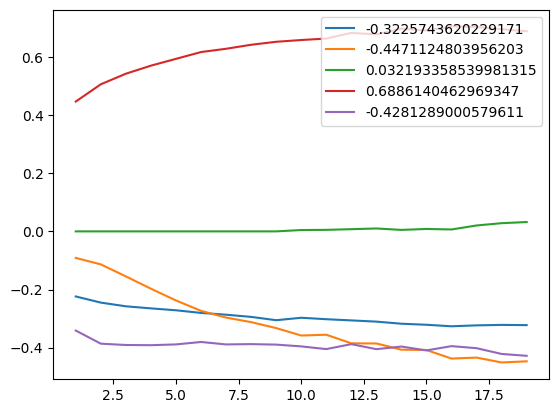

Graph of Class 1


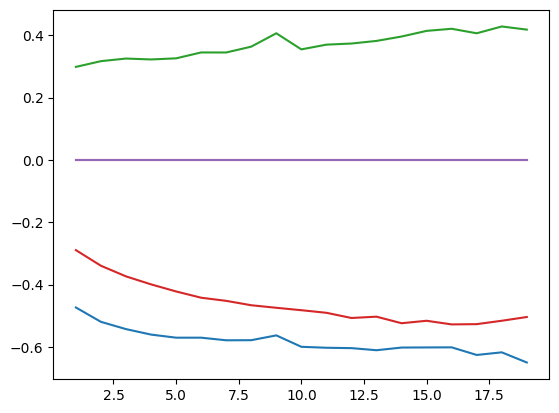

Graph of Class 2


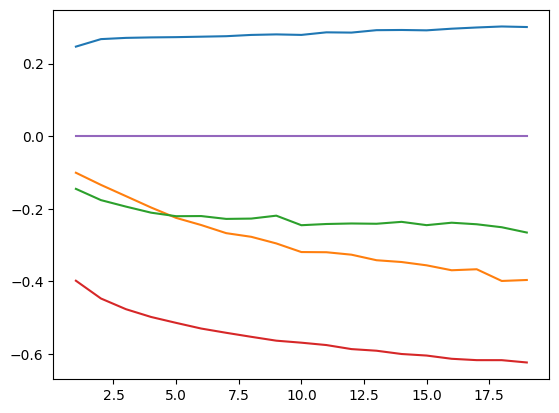

Graph of Class 3


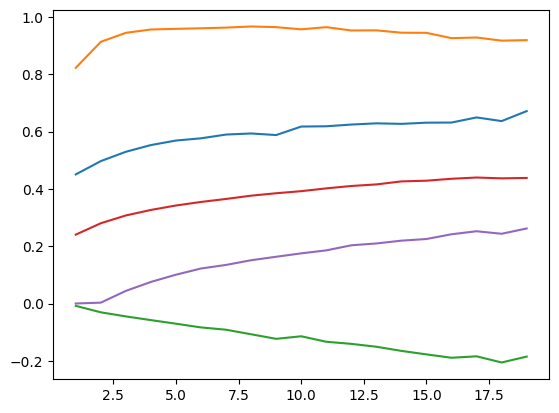

In [13]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
pointsc0 = []
pointsc1 = []
pointsc2 = []
pointsc3 = []
#a) graph w vs c to observe how w converges as c changes
for i in range(1,20):
  clf = LogisticRegression(penalty = 'l1', solver = 'saga', C = float(i), max_iter=10000)
  clf = clf.fit(X,y)
  w, w0 = clf.coef_, clf.intercept_
  pointsc0.append(w[0])
  pointsc1.append(w[1])
  pointsc2.append(w[2])
  pointsc3.append(w[3])
plt.figure()
print("Graph of Class 0")
plt.plot(range(1,20), pointsc0, label=w[0]) #this graph is in reverse
plt.legend()
plt.show()
print("Graph of Class 1")
plt.plot(range(1,20), pointsc1) #this graph is in reverse
plt.show()
print("Graph of Class 2")
plt.plot(range(1,20), pointsc2) #this graph is in reverse
plt.show()
print("Graph of Class 3")
plt.plot(range(1,20), pointsc3) #this graph is in reverse
plt.show()
#Blue line is feature 1
#Orange line is feature 2
#Green line is feature 3
#Red Line is feature 4
#Purple line is feature 5

#B. What features are most important in each class?
In these graphs the most important feature can be identified as the one that converges the least or last. In class 0 and in Class 2 the most important feature is feature 4. In class 1, this feature is feature 1. In class 3 this feature is **very notably** feature 2.

Graph of Class 0


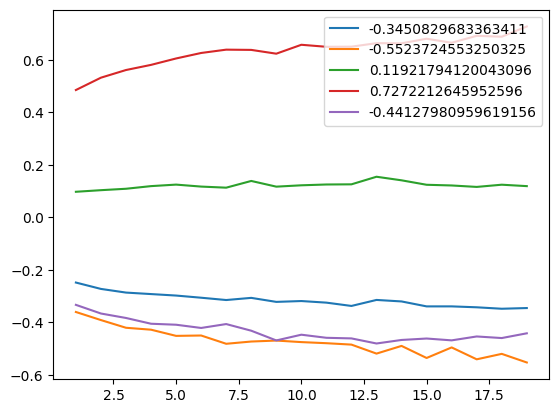

Graph of Class 1


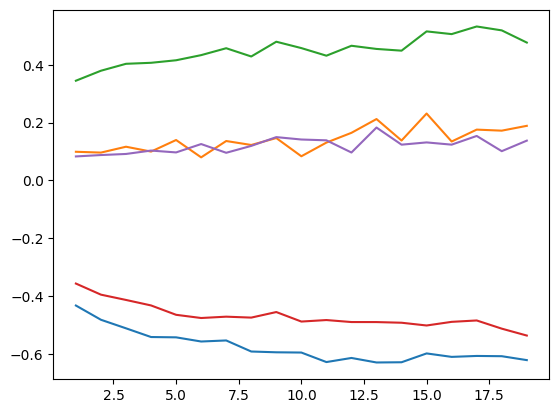

Graph of Class 2


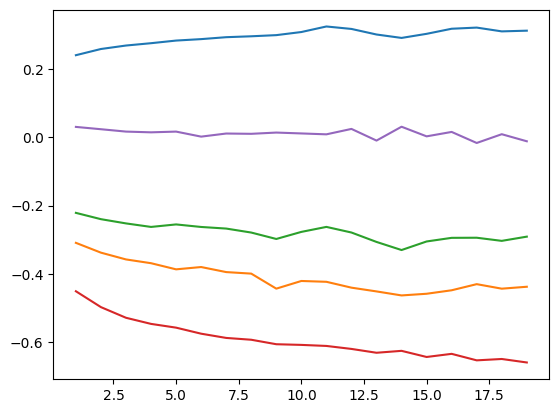

Graph of Class 3


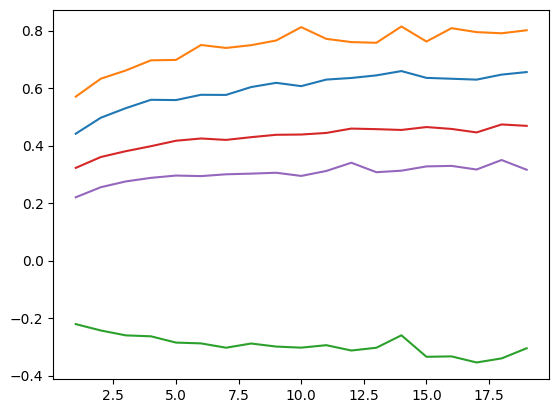

In [25]:
#c)from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
pointsc0 = []
pointsc1 = []
pointsc2 = []
pointsc3 = []
#a) graph w vs c to observe how w converges as c changes
for i in range(1,20):
  clf = LogisticRegression(penalty = 'l2', solver = 'saga', C = float(i), max_iter=10000)
  clf = clf.fit(X,y)
  w, w0 = clf.coef_, clf.intercept_
  pointsc0.append(w[0])
  pointsc1.append(w[1])
  pointsc2.append(w[2])
  pointsc3.append(w[3])
plt.figure()
print("Graph of Class 0")
plt.plot(range(1,20), pointsc0, label=w[0]) #this graph is in reverse
plt.legend()
plt.show()
print("Graph of Class 1")
plt.plot(range(1,20), pointsc1) #this graph is in reverse
plt.show()
print("Graph of Class 2")
plt.plot(range(1,20), pointsc2) #this graph is in reverse
plt.show()
print("Graph of Class 3")
plt.plot(range(1,20), pointsc3) #this graph is in reverse
plt.show()
#Blue line is feature 1
#Orange line is feature 2
#Green line is feature 3
#Red Line is feature 4
#Purple line is feature 5
#As you can see each graph below does not converge to 0, as it wants to find a solution for every feature. NOT A SPARE SOLUTION*